# Premier League Analysis

### The English Premier League is the top level of competition in English football. It is widely regarded as one of the most competitive and is one of the most watched sports competitions in the world.

I found a dataset which contains these data for each season of the premier league:

- Season
- Date
- Referee
- Home teams and away teams
- Results at full time and at half-time
- Number of goals scored by the home team at full time and that at half-time
- Number of goals scored by the away team at full time and that at half-time
- Number of: shots, shots on target, corner kicks, fouls committed, yellow cards received, and red cards received. Each of these pieces of information is available for both the home team and the away team.

I have downloaded the data for 10 seasons from 2011/2012 till 2020/2021 and I plan on making my project with this data.

Data Source: https://www.football-data.co.uk/englandm.php

### In this project I answer some questions like:

- Which team got more points through all the years ?
- Which team got more goals through all the years ?
- Which teams stayed at the premier league without getting relegated ?
- Which refree tend to give more red cards ?
- Does playing home affect the number of red cards you get ?
- What features affect most the probability of a team winning a match ?

### This project consists of 3 phases

### Phase 1: Data Wrangling
- Gathering the data
- Assessing the data
- Cleaning the data

### Phase 2: Data Analysis
- Analysis
- Visuals
- Conclusions

### Phase 3: Machine Learning
- Machine learning models
- Results and predictions



## Phase 1: Data Wrangling

#### First let's start by looking at the data for 2020/2021 season

In [113]:
import pandas as pd
import numpy as np

In [114]:
season2020_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2020\\E0.csv')

In [115]:
season2020_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


#### In my analysis I will not be looking into betting odds so I will start by dropping all the betting columns

In [116]:
season2020_df.drop(season2020_df.iloc[:, 24:], inplace = True, axis = 1)

In [117]:
season2020_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,5,4,10,8,14,1,2,2,0,0
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,11,3,8,10,7,5,2,2,0,0
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,3,3,11,1,8,9,3,1,0,0
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,7,5,5,9,2,3,0,3,0,0


The "Div" column has no importance in my analysis so I will drop this column

In [118]:
season2020_df.drop(['Div'], inplace = True, axis = 1)

I will add a "Year" column to differentiate between different seasons 

In [119]:
season2020_df['Year'] = '2020'

In [120]:
season2020_df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Year
0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,...,6,12,12,2,3,2,2,0,0,2020
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,...,5,14,11,7,3,2,1,0,0,2020
2,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,...,3,9,6,9,0,1,0,0,0,2020
3,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,...,2,13,7,8,7,2,2,0,0,2020
4,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,...,7,12,9,2,5,1,1,0,0,2020


### From the cell below we can see that there is no null values in our data

In [121]:
season2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   Time      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [122]:
season2020_df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.352632,1.342105,0.665789,0.605263,12.815789,11.363158,4.544737,4.084211,11.223684,10.550000,5.557895,4.631579,1.423684,1.447368,0.050000,0.071053
std,1.320378,1.257722,0.825956,0.806945,5.490482,4.880602,2.594005,2.258555,3.438102,3.474768,3.039635,2.667315,1.107407,1.159960,0.218232,0.286373
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,3.000000,9.000000,8.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,11.000000,4.000000,4.000000,11.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.250000,6.000000,5.250000,13.000000,13.000000,7.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,9.000000,7.000000,4.000000,4.000000,29.000000,28.000000,14.000000,14.000000,23.000000,21.000000,16.000000,13.000000,6.000000,5.000000,1.000000,2.000000


In [123]:
season2020_df.Date = season2020_df.Date.astype('datetime64[ns]')
season2020_df.Time = season2020_df.Time.astype('datetime64[ns]')

In [124]:
season2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      380 non-null    datetime64[ns]
 1   Time      380 non-null    datetime64[ns]
 2   HomeTeam  380 non-null    object        
 3   AwayTeam  380 non-null    object        
 4   FTHG      380 non-null    int64         
 5   FTAG      380 non-null    int64         
 6   FTR       380 non-null    object        
 7   HTHG      380 non-null    int64         
 8   HTAG      380 non-null    int64         
 9   HTR       380 non-null    object        
 10  Referee   380 non-null    object        
 11  HS        380 non-null    int64         
 12  AS        380 non-null    int64         
 13  HST       380 non-null    int64         
 14  AST       380 non-null    int64         
 15  HF        380 non-null    int64         
 16  AF        380 non-null    int64         
 17  HC        380 no

In [125]:
teams2020 = season2020_df.HomeTeam.unique()
teams2020.sort()
teams2020

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Newcastle',
       'Sheffield United', 'Southampton', 'Tottenham', 'West Brom',
       'West Ham', 'Wolves'], dtype=object)

### Now I will create a function to calculate the end of season table

Function inputs: Name of teams, season dataframe, year

Function output: DataFrame containing the end of season table

In [126]:
def Calculate_Table(teams, seasonDF, year):
    table = {}
    for team in teams:
        numberOfWins = seasonDF[((seasonDF.HomeTeam == team) & (seasonDF.FTR == 'H')) |
              ((seasonDF.AwayTeam == team) & (seasonDF.FTR == 'A'))].Date.count()
        
        numberOfDraws = seasonDF[((seasonDF.HomeTeam == team) | (seasonDF.AwayTeam == team)) &
              (seasonDF.FTR == 'D')].Date.count()
        
        teamTotalPoints = numberOfWins * 3 + numberOfDraws
        
        table[team] = teamTotalPoints
        
        tableDict = dict(sorted(table.items(), key=lambda item: item[1], reverse=True))
        
        tableDf = pd.DataFrame(list(tableDict.items()),columns = ['Team','Points'])
        tableDf['Position'] = (tableDf.index +1)
        tableDf['Year'] = year
        
    return tableDf

In [127]:
table2020 = Calculate_Table(teams2020, season2020_df, '2020')

In [128]:
table2020

,Team,Points,Position,Year
0,Man City,86,1,2020
1,Man United,74,2,2020
2,Liverpool,69,3,2020
3,Chelsea,67,4,2020
4,Leicester,66,5,2020
5,West Ham,65,6,2020
6,Tottenham,62,7,2020
7,Arsenal,61,8,2020
8,Everton,59,9,2020
9,Leeds,59,10,2020


### Now I will create a function to calculate the points of each team after each match

Function inputs: Name of teams, season dataframe, year

Function output: DataFrame containing the points of each team after each match

In [129]:
def Calculate_Match_Points(teams, seasonDF, year):
    teamNumber = 1
    for team in teams:
        itr = 0
        totalPoints = 0
        scores = {}
        
        for index, row in seasonDF.iterrows():
            if row["HomeTeam"] == team or row["AwayTeam"] == team:
                itr += 1
                if (row["HomeTeam"] == team and row["FTR"] == 'H') or (row["AwayTeam"] == team and row["FTR"] == 'A') :
                    totalPoints += 3
                    scores['match ' + str(itr)] = totalPoints

                elif (row["HomeTeam"] == team and row["FTR"] == 'A') or (row["AwayTeam"] == team and row["FTR"] == 'H') :
                    scores['match ' + str(itr)] = totalPoints

                elif (row["HomeTeam"] == team and row["FTR"] == 'D') or (row["AwayTeam"] == team and row["FTR"] == 'D') :
                    totalPoints += 1
                    scores['match ' + str(itr)] = totalPoints
        
        teamDf = pd.DataFrame(list(scores.items()),columns = ['MatchNumber', team])
        if teamNumber == 1:
            scoresDf = teamDf
            teamNumber += 1
        else:
            scoresDf = scoresDf.merge(teamDf, on='MatchNumber', how='left')
            
    scoresDf['Year'] = year
    return scoresDf

In [130]:
scores = Calculate_Match_Points(teams2020,season2020_df, 2020)

In [131]:
scores

,MatchNumber,Arsenal,Aston Villa,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Fulham,Leeds,...,Man City,Man United,Newcastle,Sheffield United,Southampton,Tottenham,West Brom,West Ham,Wolves,Year
0,match 1,3,3,0,0,3,3,3,0,0,...,3,0,3,0,0,0,0,0,3,2020
1,match 2,6,6,3,0,3,6,6,0,3,...,3,3,3,0,0,3,0,0,3,2020
2,match 3,6,9,3,0,4,6,9,0,6,...,4,3,4,0,3,4,1,3,3,2020
3,match 4,9,12,3,1,7,6,12,0,7,...,7,6,7,0,6,7,1,6,6,2020
4,match 5,9,12,4,1,8,7,13,1,7,...,8,7,7,1,7,8,2,7,9,2020
5,match 6,9,12,5,1,9,10,13,1,10,...,11,7,8,1,10,11,3,8,10,2020
6,match 7,12,15,5,2,12,10,13,4,10,...,12,10,11,1,13,14,3,8,13,2020
7,match 8,12,15,6,5,15,13,13,4,10,...,12,13,11,1,16,17,3,11,13,2020
8,match 9,13,15,9,5,18,13,16,4,11,...,15,16,11,1,17,20,3,14,14,2020
9,match 10,13,18,10,6,19,13,16,7,14,...,18,19,14,1,17,21,6,17,17,2020


# Working With All 10 Seasons

### After working with 1 dataset, I have made the first assumptions and made some functions that I will use during my work on the 10 datasets together

In [132]:
season2020_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2020\\E0.csv')
season2019_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2019\\E0.csv')
season2018_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2018\\E0.csv')
season2017_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2017\\E0.csv')
season2016_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2016\\E0.csv')
season2015_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2015\\E0.csv')
season2014_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2014\\E0.csv')
season2013_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2013\\E0.csv')
season2012_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2012\\E0.csv')
season2011_df = pd.read_csv('C:\\Users\\alaa_atef\\Desktop\\Stuff\\Data Science\\Datasets\\EPL Dataset\\2011\\E0.csv')

In [133]:
season2014_df.drop(season2014_df.tail(1).index,inplace=True)

In [134]:
seasonsList = [season2020_df, season2019_df, season2018_df, season2017_df, season2016_df, season2015_df, season2014_df,
              season2013_df, season2012_df, season2011_df]

I've noticed that some of the seasons files doesn't contain a "Time" column, so I will add that column with a string saying "Not Available"

### Now I will create a function to drop the betting columns from all 10 datasets and add a "Year" column in each dataset and add "Time" column in the datasets which doesn't have the "Time" column

Function inputs: List of Datasets

Function output: None

In [135]:
def CleanData(seasonsList):
    currentYear = 2020
    for season in seasonsList:
        if currentYear < 2019:
            season.insert(2,"Time","Not Available")
        season.drop(season.iloc[:, 24:], inplace = True, axis = 1)
        season.drop(['Div'], inplace = True, axis = 1)
        season['Year'] = str(currentYear)
        currentYear -= 1
        season.Date = season.Date.astype('datetime64[ns]')

In [136]:
CleanData(seasonsList)

### Now I will create a function to group the matches for all 10 cleaned datasets

Function inputs: List of Datasets

Function output: DataFrame containing the matches for all 10 cleaned datasets

In [137]:
def GroupMatches(seasonsList):
    firstSeason = True
    
    for season in seasonsList:        
        if firstSeason == True:
            totalmatchesDf = season
            firstSeason = False            
        else:
            totalmatchesDf = totalmatchesDf.append(season, ignore_index = True)
            
    return totalmatchesDf

In [138]:
totalmatchesDf = GroupMatches(seasonsList)

In [139]:
totalmatchesDf

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Year
0,2020-12-09,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,...,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,2020
1,2020-12-09,15:00,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,...,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,2020
2,2020-12-09,17:30,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,...,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,2020
3,2020-12-09,20:00,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,...,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,2020
4,2020-09-13,14:00,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,...,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2012-05-13,Not Available,Sunderland,Man United,0.0,1.0,A,0.0,1.0,A,...,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,2011
3796,2012-05-13,Not Available,Swansea,Liverpool,1.0,0.0,H,0.0,0.0,D,...,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,2011
3797,2012-05-13,Not Available,Tottenham,Fulham,2.0,0.0,H,1.0,0.0,H,...,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,2011
3798,2012-05-13,Not Available,West Brom,Arsenal,2.0,3.0,A,2.0,2.0,D,...,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,2011


### Now I will create a function to group the names of teams for each season for all 10 cleaned datasets

Function inputs: List of Datasets

Function output: DataFrame containing the names of teams for each season for all 10 cleaned datasets

In [140]:
def CalculateSeasonsTeams(seasonsList):
    teamsOfAllSeasons = []
    for season in seasonsList:
        nameOFTeams = season.HomeTeam.unique()
        nameOFTeams.sort()
        teamsOfAllSeasons.append(nameOFTeams)
    return teamsOfAllSeasons

In [141]:
teamsOfAllSeasons = CalculateSeasonsTeams(seasonsList)

In [142]:
teamsOfAllSeasons

[array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
        'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester',
        'Liverpool', 'Man City', 'Man United', 'Newcastle',
        'Sheffield United', 'Southampton', 'Tottenham', 'West Brom',
        'West Ham', 'Wolves'], dtype=object),
 array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
        'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
        'Man City', 'Man United', 'Newcastle', 'Norwich',
        'Sheffield United', 'Southampton', 'Tottenham', 'Watford',
        'West Ham', 'Wolves'], dtype=object),
 array(['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff',
        'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield',
        'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle',
        'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves'],
       dtype=object),
 array(['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Chelse

### Now I will create a function to group the end-of-year table each season for all 10 cleaned datasets

Function inputs: List of Datasets, List of team names for each season

Function output: DataFrame containing the end-of-year table each season for all 10 cleaned datasets

In [143]:
def GroupEndOFSeasonTables(seasonsList, teamsOfAllSeasons):
    year = 2020
    counter = 0
    for season in seasonsList:
        if counter == 0:
            totalEndOfSeasonTables = Calculate_Table(teamsOfAllSeasons[counter], season, year)
            year -= 1
            counter += 1
        else:
            currentTable = Calculate_Table(teamsOfAllSeasons[counter], season, year)
            year -= 1
            counter += 1
            totalEndOfSeasonTables = totalEndOfSeasonTables.append(currentTable, ignore_index = True)
    return totalEndOfSeasonTables

In [144]:
totalEndOfSeasonTables = GroupEndOFSeasonTables(seasonsList, teamsOfAllSeasons)

In [145]:
totalEndOfSeasonTables

,Team,Points,Position,Year
0,Man City,86,1,2020
1,Man United,74,2,2020
2,Liverpool,69,3,2020
3,Chelsea,67,4,2020
4,Leicester,66,5,2020
...,...,...,...,...
195,Aston Villa,38,16,2011
196,QPR,37,17,2011
197,Bolton,36,18,2011
198,Blackburn,31,19,2011


### Now I will create a function to group the points after each match for all 10 cleaned datasets

Function inputs: List of Datasets, List of team names for each season

Function output: DataFrame containing the points after each match for all 10 cleaned datasets

In [146]:
def GroupMatchPointsOfEverySeason(seasonsList, teamsOfAllSeasons):
    year = 2020
    counter = 0
    for season in seasonsList:
        if counter == 0:
            totalMatchPoints = Calculate_Match_Points(teamsOfAllSeasons[counter], season, year)
            year -= 1
            counter += 1
        else:
            currentPoints = Calculate_Match_Points(teamsOfAllSeasons[counter], season, year)
            year -= 1
            counter += 1
            totalMatchPoints = totalMatchPoints.append(currentPoints, ignore_index = True)
    return totalMatchPoints

In [147]:
totalMatchPointsOfEverySeason = GroupMatchPointsOfEverySeason(seasonsList, teamsOfAllSeasons)

In [148]:
totalMatchPointsOfEverySeason

,MatchNumber,Arsenal,Aston Villa,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Fulham,Leeds,...,Stoke,Swansea,Hull,Middlesbrough,Sunderland,QPR,Reading,Wigan,Blackburn,Bolton
0,match 1,3,3.0,0.0,0.0,3,3.0,3,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,match 2,6,6.0,3.0,0.0,3,6.0,6,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,match 3,6,9.0,3.0,0.0,4,6.0,9,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,match 4,9,12.0,3.0,1.0,7,6.0,12,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,match 5,9,12.0,4.0,1.0,8,7.0,13,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,match 34,64,36.0,NaN,NaN,58,NaN,48,46.0,NaN,...,42.0,42.0,NaN,NaN,43.0,31.0,NaN,34.0,28.0,33.0
376,match 35,65,36.0,NaN,NaN,61,NaN,51,46.0,NaN,...,43.0,43.0,NaN,NaN,44.0,34.0,NaN,34.0,31.0,34.0
377,match 36,66,37.0,NaN,NaN,61,NaN,52,49.0,NaN,...,44.0,44.0,NaN,NaN,45.0,34.0,NaN,37.0,31.0,34.0
378,match 37,67,38.0,NaN,NaN,61,NaN,53,52.0,NaN,...,44.0,44.0,NaN,NaN,45.0,37.0,NaN,40.0,31.0,35.0


### Phase 2: Data Analysis

#### In This section I work on the 3 dataset from the last part
##### 1- totalEndOfSeasonTables
##### 2- totalmatchesDf
##### 3- totalMatchPointsOfEverySeason

In [149]:
pip install plotly==5.7.0

Note: you may need to restart the kernel to use updated packages.


In [150]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### 1- totalEndOfSeasonTables

In [151]:
seasonsTable = totalEndOfSeasonTables
seasonsTable

,Team,Points,Position,Year
0,Man City,86,1,2020
1,Man United,74,2,2020
2,Liverpool,69,3,2020
3,Chelsea,67,4,2020
4,Leicester,66,5,2020
...,...,...,...,...
195,Aston Villa,38,16,2011
196,QPR,37,17,2011
197,Bolton,36,18,2011
198,Blackburn,31,19,2011


#### First let's see the number of all teams who played through the 10 seasons

In [152]:
numberOfTeams = seasonsTable['Team'].unique().size

In [153]:
fig = go.Figure(go.Indicator(
    value =numberOfTeams,
    title = 'Number Of Teams In The Data'))

fig.show()

#### Now let's look at the total points each team got through the years

In [154]:
teamsThroughTheYears = seasonsTable.groupby('Team').sum().sort_values(by='Points', ascending=False)

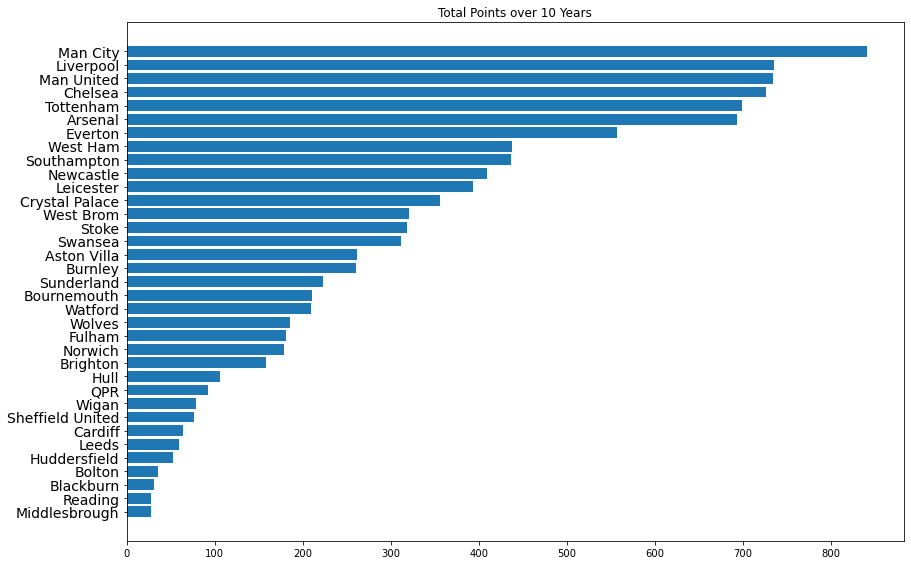

In [155]:

fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
yAxis = teamsThroughTheYears.index
xAxis = teamsThroughTheYears.Points

ax.barh(yAxis,xAxis)
ax.invert_yaxis()
plt.yticks(fontsize=14)
ax.set_title('Total Points over 10 Years')

plt.show()

#### We look at the winning teams for the last 10 years

In [156]:
winners = seasonsTable[seasonsTable.Position == 1]

<AxesSubplot:title={'center':'League Winners'}>

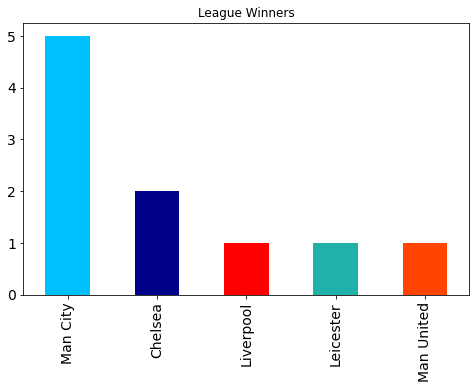

In [157]:
teamColors = ['deepskyblue', 'darkblue','red', 'lightseagreen', 'orangered' ]
winners['Team'].value_counts().plot(kind='bar' , color=teamColors, fontsize=14, title='League Winners', figsize=(8, 5))

#### Now let's look at the positions of the teams by end of the year for all the 10 years

In [158]:
years = seasonsTable[seasonsTable.Team == "Liverpool"]['Year']
LeicesterYears = seasonsTable[seasonsTable.Team == "Leicester"]['Year']

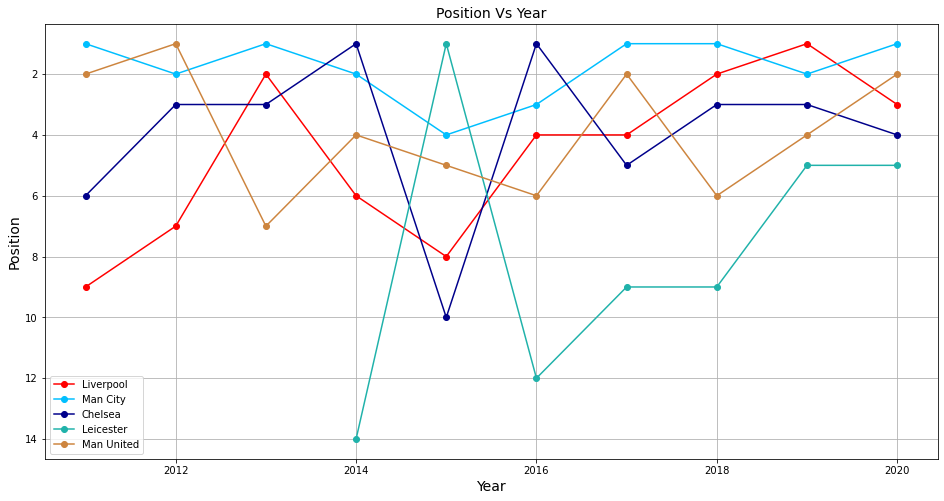

In [159]:
plt.figure(figsize=(16, 8))

plt.plot(years, seasonsTable[seasonsTable.Team == "Liverpool"]['Position'], color='red', marker='o', label='Liverpool')
plt.plot(years, seasonsTable[seasonsTable.Team == "Man City"]['Position'], color='deepskyblue', marker='o', label='Man City')
plt.plot(years, seasonsTable[seasonsTable.Team == "Chelsea"]['Position'], color='darkblue', marker='o', label='Chelsea')
plt.plot(LeicesterYears, seasonsTable[seasonsTable.Team == "Leicester"]['Position'], color='lightseagreen', marker='o', label='Leicester')
plt.plot(years, seasonsTable[seasonsTable.Team == "Man United"]['Position'], color='peru', marker='o', label='Man United')

plt.title('Position Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

#### Now we look at the teams that qualified to the champions league

In [160]:
championsLeague = seasonsTable[(seasonsTable.Position == 1) | (seasonsTable.Position == 2) | (seasonsTable.Position == 3) | (seasonsTable.Position == 4)]

<AxesSubplot:title={'center':'Champions League Qualifications'}>

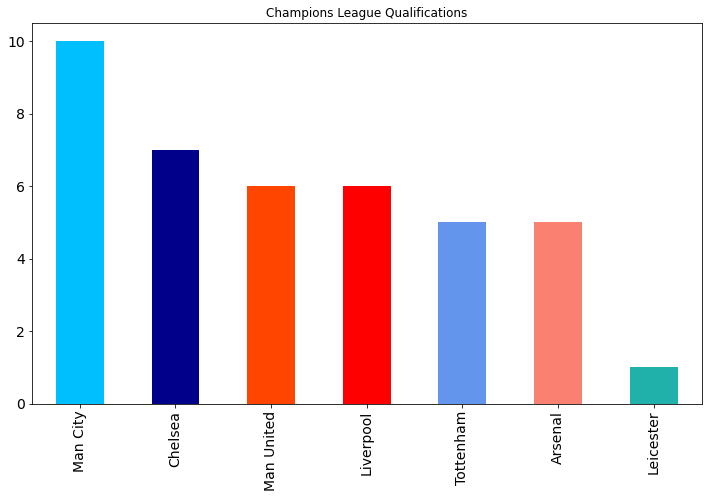

In [161]:
championsColors = ['deepskyblue', 'darkblue','orangered', 'red', 'cornflowerblue', 'salmon', 'lightseagreen' ]
championsLeague['Team'].value_counts().plot(kind='bar' , color=championsColors, title='Champions League Qualifications' , fontsize=14, figsize=(12, 7))

#### Now let's see which teams stayed in the premier league for all 10 seasons

In [162]:
seasonsTable.groupby('Team').count().sort_values(by='Points', ascending=False)

,Points,Position,Year
Team,,,
Arsenal,10,10,10
Chelsea,10,10,10
Tottenham,10,10,10
Man United,10,10,10
Liverpool,10,10,10
Everton,10,10,10
Man City,10,10,10
Southampton,9,9,9
West Ham,9,9,9


In [163]:
fig = go.Figure(go.Indicator(
    #value =numberOfTeams,
    title = {"text": "<span style='font-size:30px;color:red'>Liverpool</span>"},
    number_font_color="white",
    domain = {'x': [0, 0.9], 'y': [0.8, 1]}))

fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:darkblue'>Chelsea</span>"},
    number_font_color="white",
    domain = {'x': [0.45, 1], 'y': [0.8, 1]})
)
fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:deepskyblue'>Man City</span>"},
    number_font_color="white",
    domain = {'x': [0, 0.3], 'y': [0.8, 1]})
)
fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:salmon'>Arsenal</span>"},
    number_font_color="white",
    domain = {'x': [0, 0.01], 'y': [0.2, 0]})
)
fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:cornflowerblue'>Tottenham</span>"},
    number_font_color="white",
    domain = {'x': [0.1, 0.5], 'y': [0.2, 0.53]})
)
fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:dodgerblue'>Everton</span>"},
    number_font_color="white",
    domain = {'x': [0.2, 1], 'y': [0.3, 0.5]})
)
fig.add_trace(go.Indicator(
    title = {"text": "<span style='font-size:30px;color:orangered'>Man United</span>"},
    number_font_color="white",
    domain = {'x': [0.87, 0.9], 'y': [0.1, 0.85]})
)

fig.show()

### 2- totalmatchesDf

#### First I start by taking a general look at the data and getting some insights

In [164]:
matches = totalmatchesDf
matches

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Year
0,2020-12-09,12:30,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,A,...,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,2020
1,2020-12-09,15:00,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,H,...,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,2020
2,2020-12-09,17:30,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,H,...,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,2020
3,2020-12-09,20:00,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,D,...,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,2020
4,2020-09-13,14:00,West Brom,Leicester,0.0,3.0,A,0.0,0.0,D,...,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2012-05-13,Not Available,Sunderland,Man United,0.0,1.0,A,0.0,1.0,A,...,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,2011
3796,2012-05-13,Not Available,Swansea,Liverpool,1.0,0.0,H,0.0,0.0,D,...,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,2011
3797,2012-05-13,Not Available,Tottenham,Fulham,2.0,0.0,H,1.0,0.0,H,...,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,2011
3798,2012-05-13,Not Available,West Brom,Arsenal,2.0,3.0,A,2.0,2.0,D,...,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,2011


In [165]:
games = 3800
homeWins = matches[matches.FTR == 'H'].count()[0]
awayWins = matches[matches.FTR == 'A'].count()[0]
draws = matches[matches.FTR == 'D'].count()[0]
totalGoals = matches.FTHG.sum() + matches.FTAG.sum()
redCards = matches.HR.sum() + matches.AR.sum()
yellowCards = matches.HY.sum() + matches.AY.sum()
numberOFRefrees = len(matches.Referee.unique())

In [166]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4,
    cols=5,
    subplot_titles=('', '', 'Matches','','',
                    '', 'Home Wins', 'Away Wins','draws','',
                    '', 'Refrees', 'Yellow Cards','Red Cards','',
                    '', '', 'Goals','',''),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'},{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}],
          [{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}],
          [{'type': 'indicator'}, {'type': 'indicator'},{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}],
          [{'type': 'indicator'}, {'type': 'indicator'},{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(
    go.Indicator(mode="number", value=games),
    row=1,
    col=3,
)

fig.add_trace(
    go.Indicator(mode="number", value=homeWins),
    row=2,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=awayWins),
    row=2,
    col=3,
)

fig.add_trace(
    go.Indicator(mode="number", value=draws),
    row=2,
    col=4,
)
fig.add_trace(
    go.Indicator(mode="number", value=numberOFRefrees),
    row=3,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=yellowCards),
    row=3,
    col=3,
)

fig.add_trace(
    go.Indicator(mode="number", value=redCards),
    row=3,
    col=4,
)
fig.add_trace(
    go.Indicator(mode="number", value=totalGoals),
    row=4,
    col=3,
)


### Now let's take a look at the refrees

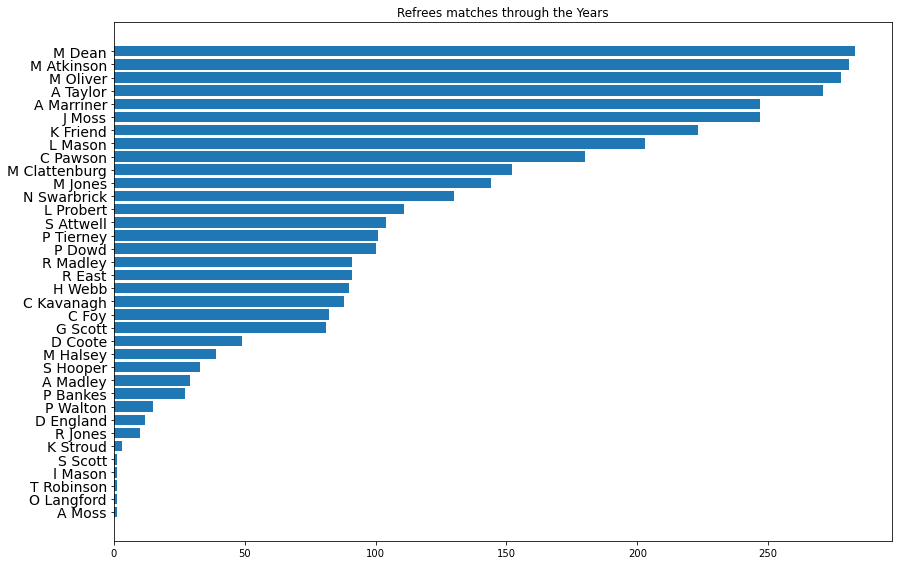

In [188]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
yAxis = matches.Referee.value_counts().index
xAxis = matches.Referee.value_counts()

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Refrees matches through the Years')

plt.show()

In [168]:
refreeYears = matches.groupby('Referee').Year.unique()

In [169]:
numberOfYearsForRefrees = []
for i in range(len(refreeYears)):
    numberOfYearsForRefrees.append(len(refreeYears[i]))

In [170]:
rdf=pd.DataFrame({'refreeYears':refreeYears,'numberOfYearsForRefrees':numberOfYearsForRefrees})
rdf.sort_values('numberOfYearsForRefrees',inplace=True, ascending=False)

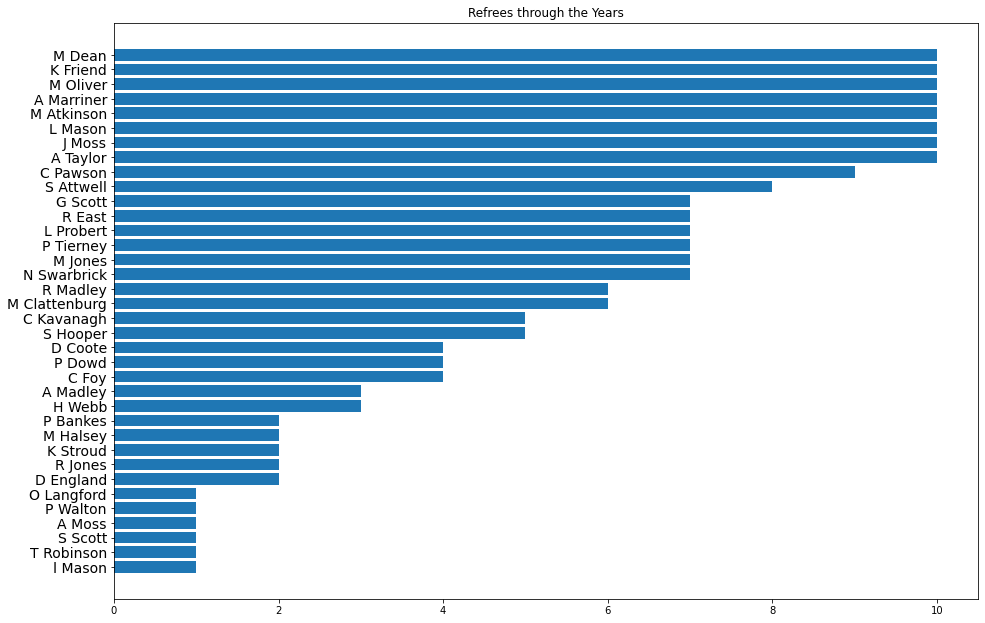

In [187]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = rdf.index
xAxis = rdf.numberOfYearsForRefrees

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Refrees through the Years')

plt.show()

In [172]:
ycardsByRefree = matches.groupby('Referee').HY.sum() + matches.groupby('Referee').AY.sum()
ycardsByRefree.sort_values(ascending=False, inplace = True)

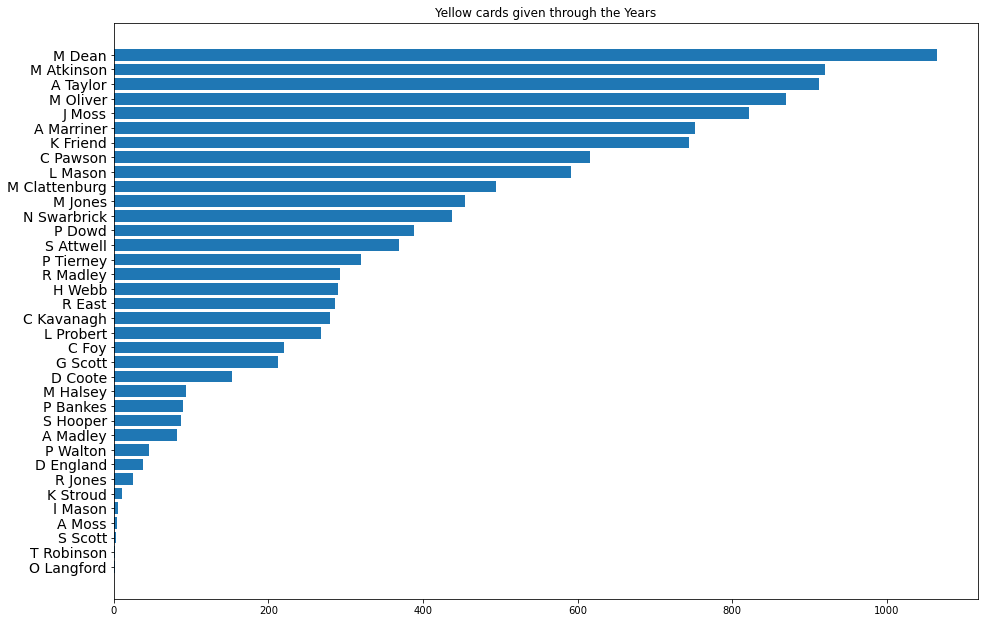

In [185]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = ycardsByRefree.index
xAxis = ycardsByRefree

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Yellow cards given through the Years')

plt.show()

In [174]:
rCardsByRefree = matches.groupby('Referee').HR.sum() + matches.groupby('Referee').AR.sum()
rCardsByRefree.sort_values(ascending=False, inplace = True)

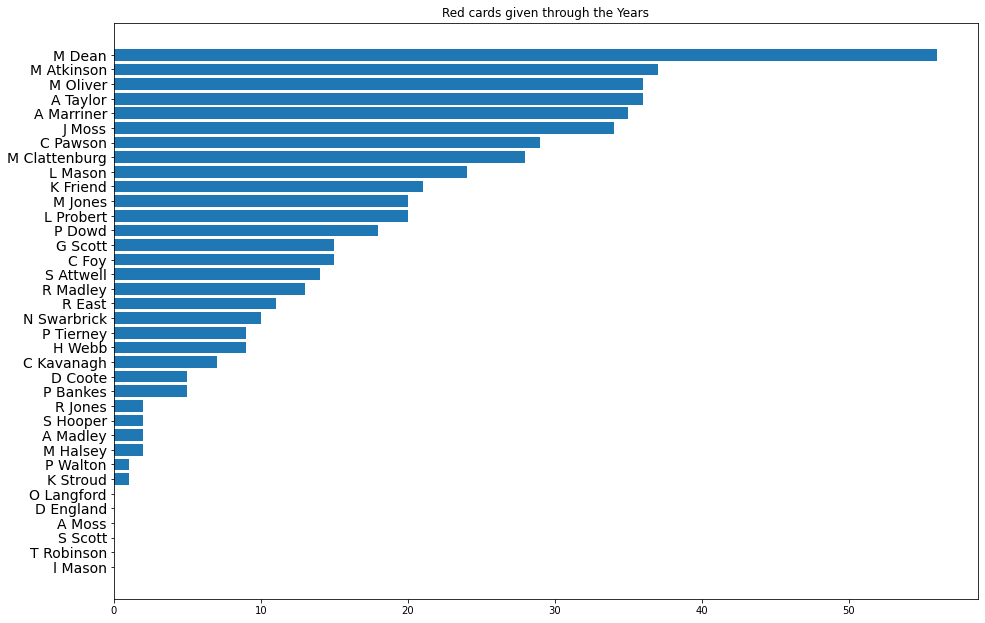

In [186]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = rCardsByRefree.index
xAxis = rCardsByRefree

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Red cards given through the Years')

plt.show()

#### Now we look at cards given to home vs away teams

In [177]:
yellowCardsdata = {'homeYellowCards':matches.HY.sum(), 'awayYellowCards':matches.AY.sum()}

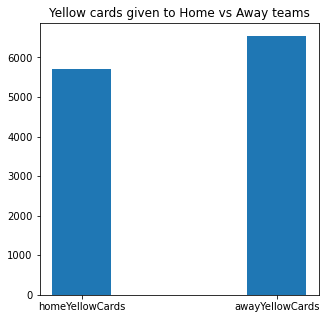

In [181]:
fig = plt.figure(figsize = (5, 5))
plt.bar(yellowCardsdata.keys(), yellowCardsdata.values(), width = 0.3)

plt.title("Yellow cards given to Home vs Away teams")
plt.show()

In [179]:
redCardsdata = {'homeRedCards':matches.HR.sum(), 'awayRedCards':matches.AR.sum()}

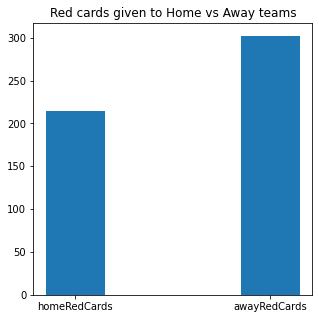

In [182]:
fig = plt.figure(figsize = (5, 5))
plt.bar(redCardsdata.keys(), redCardsdata.values(), width = 0.3)

plt.title("Red cards given to Home vs Away teams")
plt.show()

#### Now we look at the comebacks
I define a comeback as: a team was loosing by half time, then in the second half the team made it a draw or won the match

In [69]:
numberOfCombacks = len(matches[(matches.HTR != 'D') & (matches.HTR != matches.FTR)])
drawComebacks = len(matches[(matches.HTR != 'D') & (matches.HTR != matches.FTR) & (matches.FTR == 'D')])
winComebacks = numberOfCombacks - drawComebacks
homeComeBack = len(matches[(matches.HTR == 'A') & (matches.FTR == 'H')])
awayComeBack = len(matches[(matches.HTR == 'H') & (matches.FTR == 'A')])

In [70]:
fig = go.Figure(go.Indicator(
    value =drawComebacks,
    title = {"text": "Draws"},
    domain = {'x': [0, 0.9], 'y': [0.8, 1]}))

fig.add_trace(go.Indicator(
    value =winComebacks,
    title = {"text": "Wins"},
    domain = {'x': [0.45, 1], 'y': [0.8, 1]})
)
fig.add_trace(go.Indicator(
    value =numberOfCombacks,
    title = {"text": "Comebacks"},
    domain = {'x': [0, 0.3], 'y': [0.8, 1]})
)
fig.add_trace(go.Indicator(
    value =homeComeBack,
    title = {"text": "Home Comebacks"},
    domain = {'x': [0.1, 0.5], 'y': [0.2, 0.53]})
)
fig.add_trace(go.Indicator(
    value =awayComeBack,
    title = {"text": "Away Comebacks"},
    domain = {'x': [0.2, 1], 'y': [0.2, 0.53]})
)

fig.show()

#### Now we look at some statistics about the shots

In [71]:
homeShotsGames = len(matches[(matches.HS > matches.AS)])
awayShotsGames = len(matches[(matches.HS < matches.AS)])
homeShotsOnTargetGames = len(matches[(matches.HST > matches.AST)])
awayShotsOnTargetGames = len(matches[(matches.HST < matches.AST)])

In [72]:
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('Matches with more home shots','Matches with more away shots',
                    'Matches with more home shots on target','Matches with more away shots on target'),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
          [ {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(
    go.Indicator(mode="number", value=homeShotsGames),
    row=1,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=awayShotsGames),
    row=1,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=homeShotsOnTargetGames),
    row=2,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=awayShotsOnTargetGames),
    row=2,
    col=2,
)

#### Now we look at some team statistics through the seasons

In [73]:
teamGoals = matches.groupby('HomeTeam').FTHG.sum() + matches.groupby('AwayTeam').FTAG.sum()
teamGoals.sort_values(ascending=False, inplace = True)

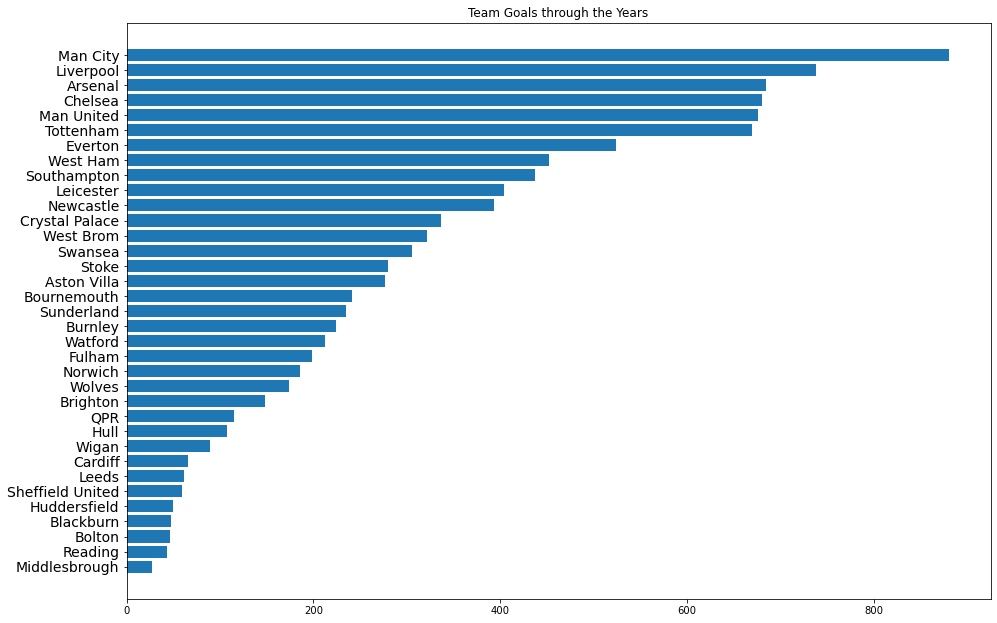

In [189]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamGoals.index
xAxis = teamGoals

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Goals through the Years')

plt.show()

In [75]:
teamShots = matches.groupby('HomeTeam').HS.sum() + matches.groupby('AwayTeam').AS.sum()
teamShots.sort_values(ascending=False, inplace = True)

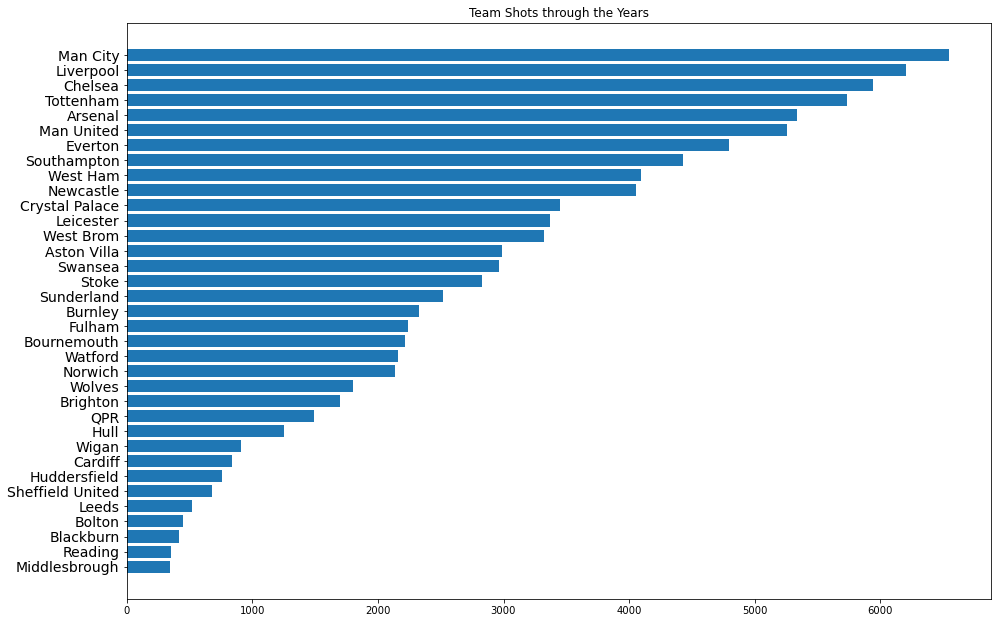

In [190]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamShots.index
xAxis = teamShots

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Shots through the Years')

plt.show()

In [77]:
teamShotsOnTarget = matches.groupby('HomeTeam').HST.sum() + matches.groupby('AwayTeam').AST.sum()
teamShotsOnTarget.sort_values(ascending=False, inplace = True)

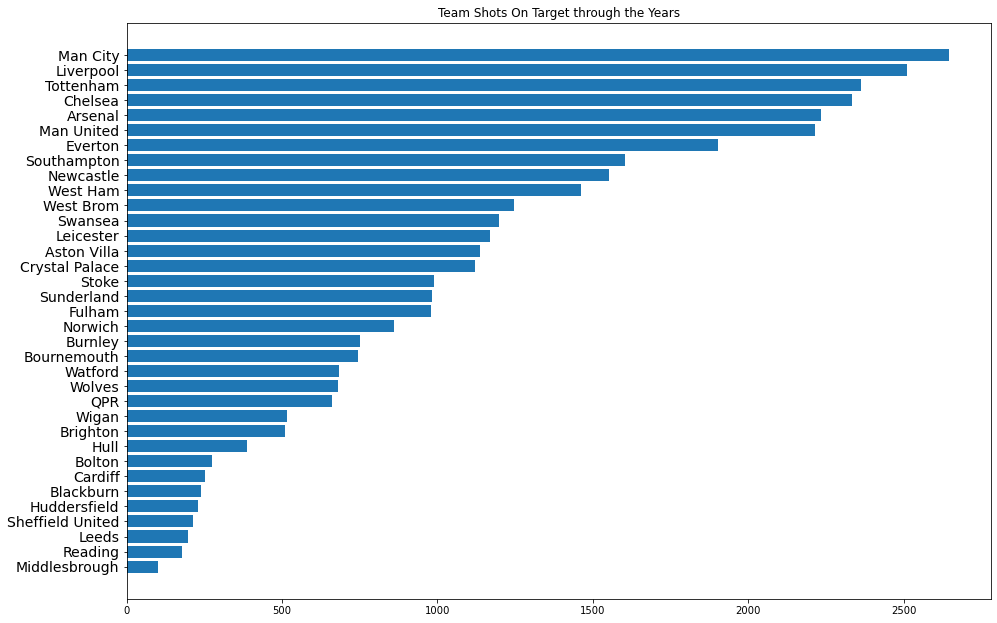

In [191]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamShotsOnTarget.index
xAxis = teamShotsOnTarget

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Shots On Target through the Years')

plt.show()

In [79]:
teamFouls = matches.groupby('HomeTeam').HF.sum() + matches.groupby('AwayTeam').AF.sum()
teamFouls.sort_values(ascending=False, inplace = True)

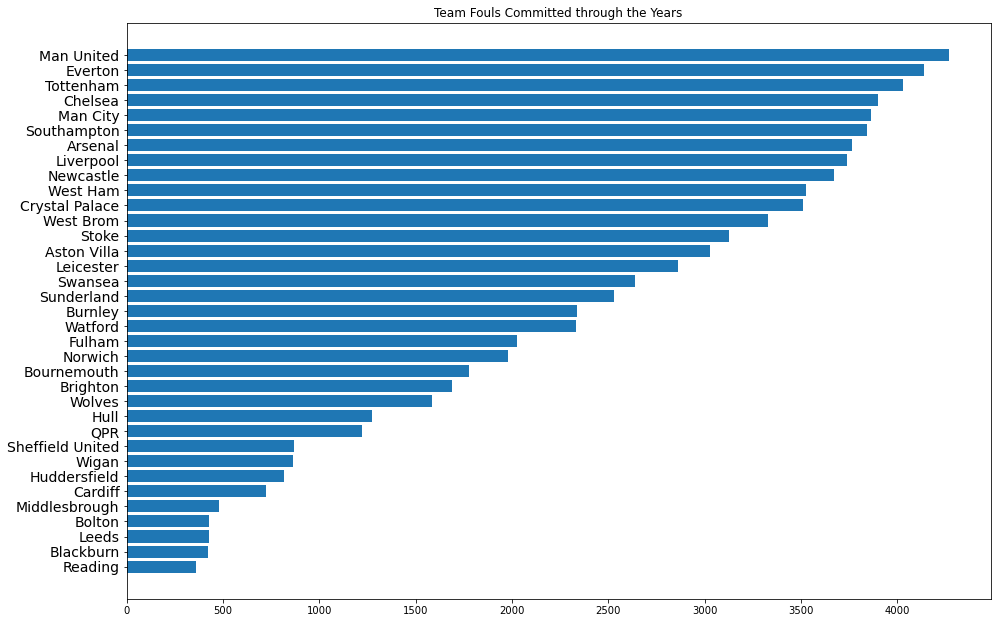

In [192]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamFouls.index
xAxis = teamFouls

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Fouls Committed through the Years')

plt.show()

In [81]:
teamCorners = matches.groupby('HomeTeam').HC.sum() + matches.groupby('AwayTeam').AC.sum()
teamCorners.sort_values(ascending=False, inplace = True)

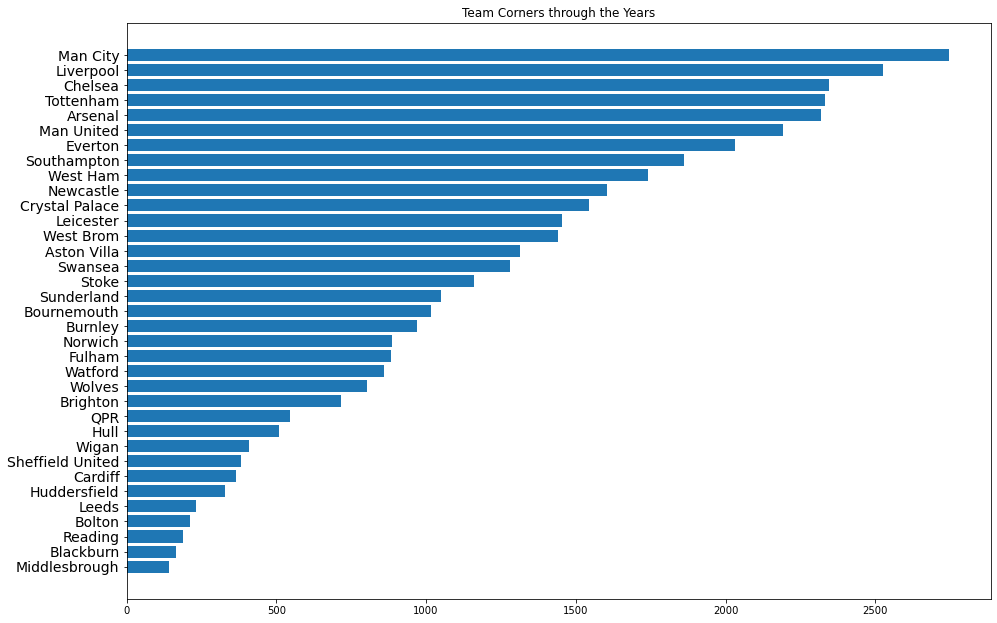

In [193]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamCorners.index
xAxis = teamCorners

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Corners through the Years')

plt.show()

In [83]:
teamYellowCards = matches.groupby('HomeTeam').HY.sum() + matches.groupby('AwayTeam').AY.sum()
teamYellowCards.sort_values(ascending=False, inplace = True)

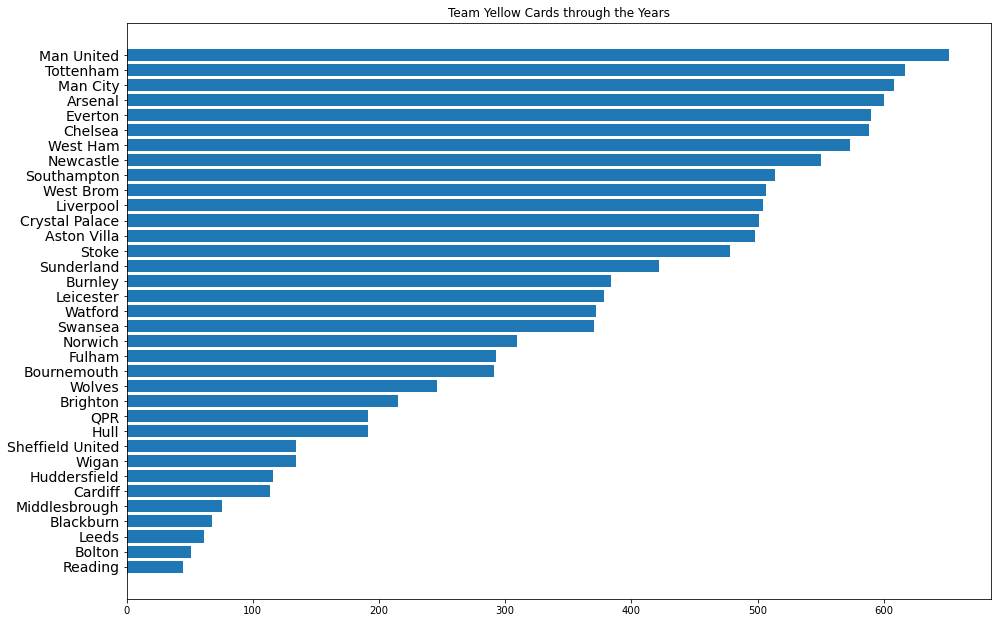

In [194]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamYellowCards.index
xAxis = teamYellowCards

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Yellow Cards through the Years')

plt.show()

In [85]:
teamRedCards = matches.groupby('HomeTeam').HR.sum() + matches.groupby('AwayTeam').AR.sum()
teamRedCards.sort_values(ascending=False, inplace = True)

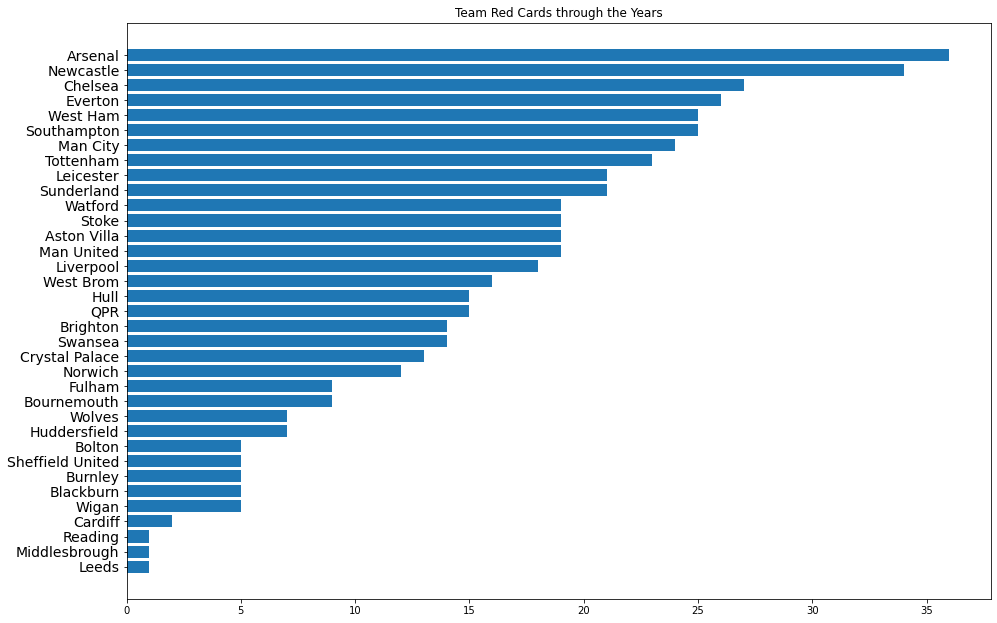

In [195]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
yAxis = teamRedCards.index
xAxis = teamRedCards

ax.barh(yAxis,xAxis)
ax.invert_yaxis()

plt.yticks(fontsize=14)
ax.set_title('Team Red Cards through the Years')

plt.show()

#### Now we look at which features contribute more to winning a match
I start by looking at the probability of a team winning having more shots, shots on target, corners, fouls, less cards.
Then I turn the results into a percentage and group them into a graph

In [87]:
teamsWithMoreShotsWinning = len(matches[((matches.HS > matches.AS) & (matches.FTR == 'H')) | ((matches.HS < matches.AS) & (matches.FTR == 'A'))])
teamsWithLessShotsWinning = len(matches[((matches.HS > matches.AS) & (matches.FTR == 'A')) | ((matches.HS < matches.AS) & (matches.FTR == 'H'))])
teamsWithMoreShotsOnTargetWinning = len(matches[((matches.HST > matches.AST) & (matches.FTR == 'H')) | ((matches.HST < matches.AST) & (matches.FTR == 'A'))])
teamsWithLessShotsOnTargetWinning = len(matches[((matches.HST > matches.AST) & (matches.FTR == 'A')) | ((matches.HST < matches.AST) & (matches.FTR == 'H'))])

In [88]:
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('Teams with more shots winning','Teams with less shots winning',
                    'Teams with more shots on target winning','Teams with less shots on target winning'),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
          [ {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreShotsWinning),
    row=1,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessShotsWinning),
    row=1,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreShotsOnTargetWinning),
    row=2,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessShotsOnTargetWinning),
    row=2,
    col=2,
)

In [89]:
teamsWithMoreFoulsWinning = len(matches[((matches.HF > matches.AF) & (matches.FTR == 'H')) | ((matches.HF < matches.AF) & (matches.FTR == 'A'))])
teamsWithLessFoulsWinning = len(matches[((matches.HF > matches.AF) & (matches.FTR == 'A')) | ((matches.HF < matches.AF) & (matches.FTR == 'H'))])
teamsWithMoreCornersWinning = len(matches[((matches.HC > matches.AC) & (matches.FTR == 'H')) | ((matches.HC < matches.AC) & (matches.FTR == 'A'))])
teamsWithLessCornersWinning = len(matches[((matches.HC > matches.AC) & (matches.FTR == 'A')) | ((matches.HC < matches.AC) & (matches.FTR == 'H'))])

In [90]:
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('Teams with less fouls winning','Teams with more fouls winning',
                    'Teams with more corners winning','Teams with less corners winning'),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
          [ {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessFoulsWinning),
    row=1,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreFoulsWinning),
    row=1,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreCornersWinning),
    row=2,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessCornersWinning),
    row=2,
    col=2,
)

In [91]:
teamsWithMoreYellowWinning = len(matches[((matches.HY > matches.AY) & (matches.FTR == 'H')) | ((matches.HY < matches.AY) & (matches.FTR == 'A'))])
teamsWithLessYellowinning = len(matches[((matches.HY > matches.AY) & (matches.FTR == 'A')) | ((matches.HY < matches.AY) & (matches.FTR == 'H'))])
teamsWithMoreRedWinning = len(matches[((matches.HR > matches.AR) & (matches.FTR == 'H')) | ((matches.HR < matches.AR) & (matches.FTR == 'A'))])
teamsWithLessRedWinning = len(matches[((matches.HR > matches.AR) & (matches.FTR == 'A')) | ((matches.HR < matches.AR) & (matches.FTR == 'H'))])

In [92]:
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('Teams with less Yellow cards winning','Teams with more Yellow cards winning',
                    'Teams with less Red cards winning','Teams with more Red cards winning'),
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
          [ {'type': 'indicator'}, {'type': 'indicator'}]]
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessYellowinning),
    row=1,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreYellowWinning),
    row=1,
    col=2,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithLessRedWinning),
    row=2,
    col=1,
)

fig.add_trace(
    go.Indicator(mode="number", value=teamsWithMoreRedWinning),
    row=2,
    col=2,
)

In [93]:
wShots = teamsWithMoreShotsWinning/(teamsWithMoreShotsWinning + teamsWithLessShotsWinning)
wShotsOnTarget = teamsWithMoreShotsOnTargetWinning/(teamsWithMoreShotsOnTargetWinning + teamsWithLessShotsOnTargetWinning)
wFouls = teamsWithLessFoulsWinning/(teamsWithLessFoulsWinning + teamsWithMoreFoulsWinning)
wCorners = teamsWithMoreCornersWinning/(teamsWithMoreCornersWinning + teamsWithLessCornersWinning)
wYellow = teamsWithLessYellowinning/(teamsWithLessYellowinning + teamsWithMoreYellowWinning)
wRed = teamsWithLessRedWinning/(teamsWithLessRedWinning + teamsWithMoreRedWinning)

In [94]:
wTitles = ['Shots', 'ShotsOnTarget', 'LessFouls', 'Corners','LessYellow','LessRed']
wValues = [wShots, wShotsOnTarget, wFouls, wCorners, wYellow, wRed]

#### Now I draw a graph with the contribution of each feature into winning a match

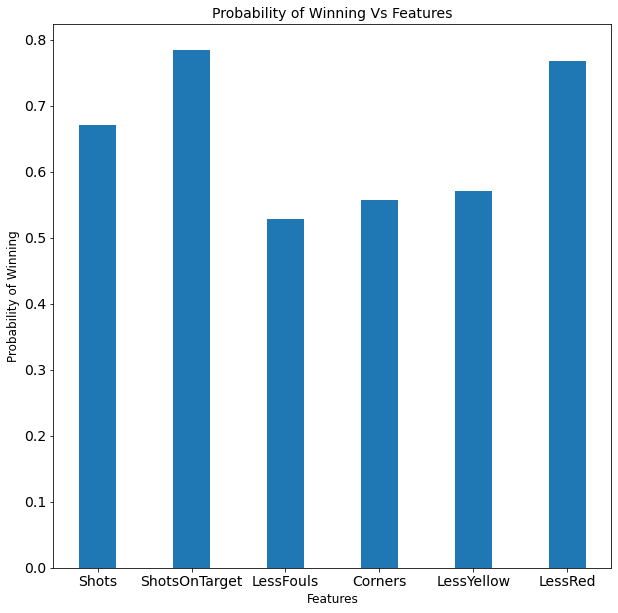

In [205]:
fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.bar(wTitles, wValues, width = 0.4)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Probability of Winning Vs Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Probability of Winning', fontsize=12)
plt.show()

### 3- totalMatchPointsOfEverySeason

In [96]:
matchPoints = totalMatchPointsOfEverySeason

In [97]:
matchPoints

,MatchNumber,Arsenal,Aston Villa,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Fulham,Leeds,...,Stoke,Swansea,Hull,Middlesbrough,Sunderland,QPR,Reading,Wigan,Blackburn,Bolton
0,match 1,3,3.0,0.0,0.0,3,3.0,3,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,match 2,6,6.0,3.0,0.0,3,6.0,6,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,match 3,6,9.0,3.0,0.0,4,6.0,9,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,match 4,9,12.0,3.0,1.0,7,6.0,12,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,match 5,9,12.0,4.0,1.0,8,7.0,13,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,match 34,64,36.0,NaN,NaN,58,NaN,48,46.0,NaN,...,42.0,42.0,NaN,NaN,43.0,31.0,NaN,34.0,28.0,33.0
376,match 35,65,36.0,NaN,NaN,61,NaN,51,46.0,NaN,...,43.0,43.0,NaN,NaN,44.0,34.0,NaN,34.0,31.0,34.0
377,match 36,66,37.0,NaN,NaN,61,NaN,52,49.0,NaN,...,44.0,44.0,NaN,NaN,45.0,34.0,NaN,37.0,31.0,34.0
378,match 37,67,38.0,NaN,NaN,61,NaN,53,52.0,NaN,...,44.0,44.0,NaN,NaN,45.0,37.0,NaN,40.0,31.0,35.0


#### In this section I look at the performance of each of the teams that stayed in the premier league for all the seasons
I draw a graph for each team showing the number of points the team got after each match for all the seasons

In [98]:
matchNumbers = list(range(1,38+1))

In [99]:
mancitySeason10 = matchPoints['Man City'][0:38]
mancitySeason9 = matchPoints['Man City'][38:76]
mancitySeason8 = matchPoints['Man City'][76:114]
mancitySeason7 = matchPoints['Man City'][114:152]
mancitySeason6 = matchPoints['Man City'][152:190]
mancitySeason5 = matchPoints['Man City'][190:228]
mancitySeason4 = matchPoints['Man City'][228:266]
mancitySeason3 = matchPoints['Man City'][266:304]
mancitySeason2 = matchPoints['Man City'][304:342]
mancitySeason1 = matchPoints['Man City'][342:380]

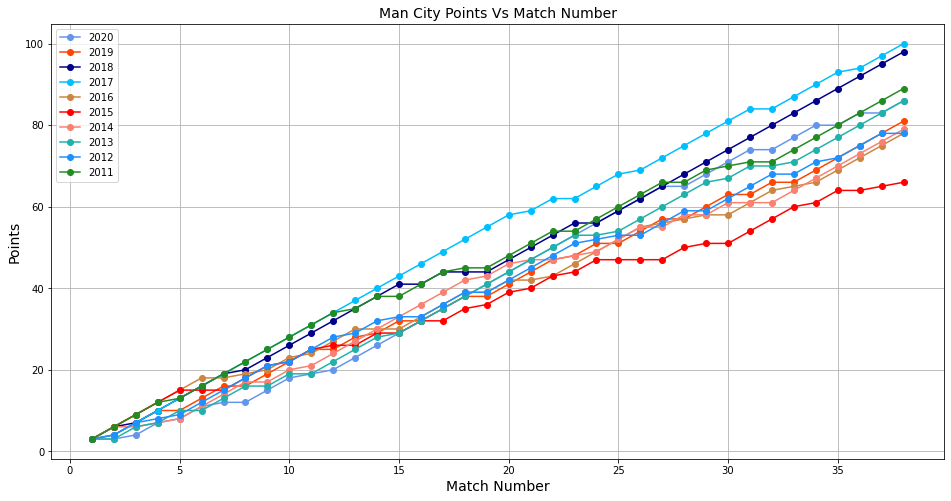

In [196]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, mancitySeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, mancitySeason9, color='orangered', marker='o', label='2019')
plt.plot(matchNumbers, mancitySeason8, color='darkblue', marker='o', label='2018')
plt.plot(matchNumbers, mancitySeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, mancitySeason6, color='peru', marker='o', label='2016')
plt.plot(matchNumbers, mancitySeason5, color='red', marker='o', label='2015')
plt.plot(matchNumbers, mancitySeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, mancitySeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, mancitySeason2, color='dodgerblue', marker='o', label='2012')
plt.plot(matchNumbers, mancitySeason1, color='forestgreen', marker='o', label='2011')

plt.title('Man City Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [101]:
chelseaSeason10 = matchPoints['Chelsea'][0:38]
chelseaSeason9 = matchPoints['Chelsea'][38:76]
chelseaSeason8 = matchPoints['Chelsea'][76:114]
chelseaSeason7 = matchPoints['Chelsea'][114:152]
chelseaSeason6 = matchPoints['Chelsea'][152:190]
chelseaSeason5 = matchPoints['Chelsea'][190:228]
chelseaSeason4 = matchPoints['Chelsea'][228:266]
chelseaSeason3 = matchPoints['Chelsea'][266:304]
chelseaSeason2 = matchPoints['Chelsea'][304:342]
chelseaSeason1 = matchPoints['Chelsea'][342:380]

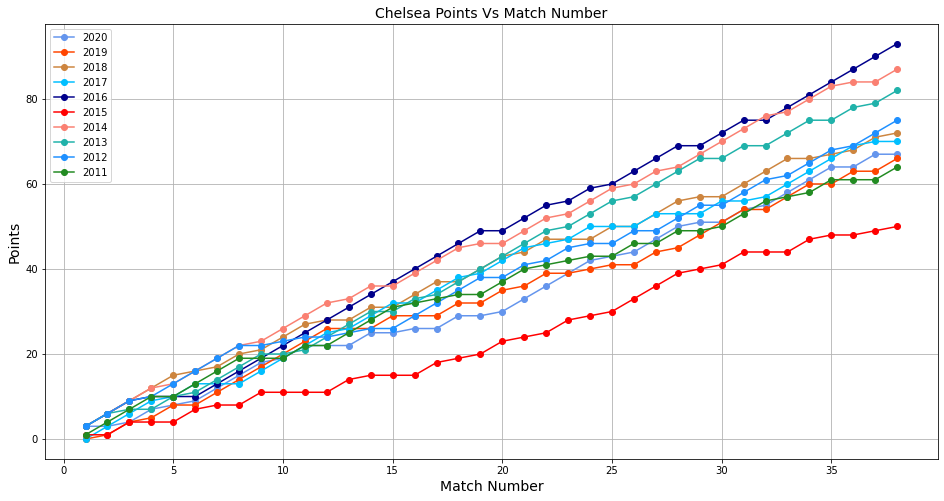

In [197]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, chelseaSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, chelseaSeason9, color='orangered', marker='o', label='2019')
plt.plot(matchNumbers, chelseaSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, chelseaSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, chelseaSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, chelseaSeason5, color='red', marker='o', label='2015')
plt.plot(matchNumbers, chelseaSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, chelseaSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, chelseaSeason2, color='dodgerblue', marker='o', label='2012')
plt.plot(matchNumbers, chelseaSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Chelsea Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [103]:
liverpoolSeason10 = matchPoints['Liverpool'][0:38]
liverpoolSeason9 = matchPoints['Liverpool'][38:76]
liverpoolSeason8 = matchPoints['Liverpool'][76:114]
liverpoolSeason7 = matchPoints['Liverpool'][114:152]
liverpoolSeason6 = matchPoints['Liverpool'][152:190]
liverpoolSeason5 = matchPoints['Liverpool'][190:228]
liverpoolSeason4 = matchPoints['Liverpool'][228:266]
liverpoolSeason3 = matchPoints['Liverpool'][266:304]
liverpoolSeason2 = matchPoints['Liverpool'][304:342]
liverpoolSeason1 = matchPoints['Liverpool'][342:380]

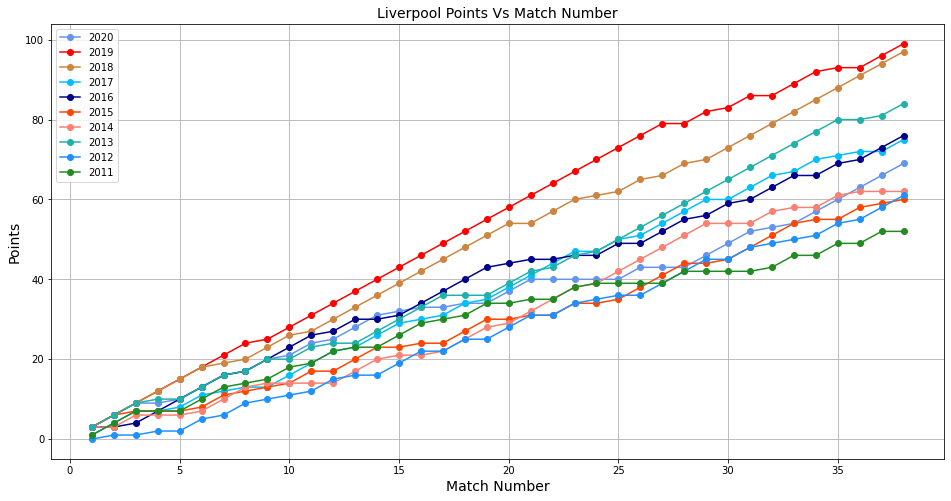

In [198]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, liverpoolSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, liverpoolSeason9, color='red', marker='o', label='2019')
plt.plot(matchNumbers, liverpoolSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, liverpoolSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, liverpoolSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, liverpoolSeason5, color='orangered', marker='o', label='2015')
plt.plot(matchNumbers, liverpoolSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, liverpoolSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, liverpoolSeason2, color='dodgerblue', marker='o', label='2012')
plt.plot(matchNumbers, liverpoolSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Liverpool Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [105]:
manUtdSeason10 = matchPoints['Man United'][0:38]
manUtdSeason9 = matchPoints['Man United'][38:76]
manUtdSeason8 = matchPoints['Man United'][76:114]
manUtdSeason7 = matchPoints['Man United'][114:152]
manUtdSeason6 = matchPoints['Man United'][152:190]
manUtdSeason5 = matchPoints['Man United'][190:228]
manUtdSeason4 = matchPoints['Man United'][228:266]
manUtdSeason3 = matchPoints['Man United'][266:304]
manUtdSeason2 = matchPoints['Man United'][304:342]
manUtdSeason1 = matchPoints['Man United'][342:380]

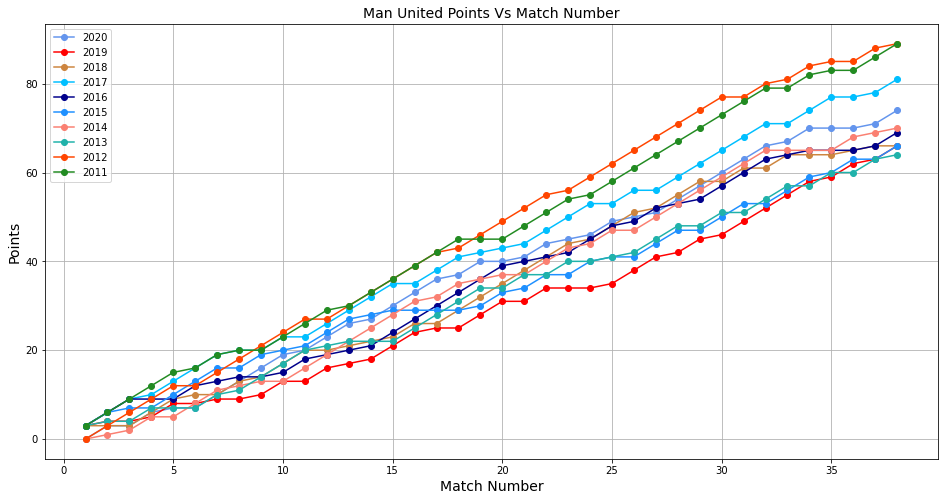

In [199]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, manUtdSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, manUtdSeason9, color='red', marker='o', label='2019')
plt.plot(matchNumbers, manUtdSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, manUtdSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, manUtdSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, manUtdSeason5, color='dodgerblue', marker='o', label='2015')
plt.plot(matchNumbers, manUtdSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, manUtdSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, manUtdSeason2, color='orangered', marker='o', label='2012')
plt.plot(matchNumbers, manUtdSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Man United Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [107]:
arsenalSeason10 = matchPoints['Arsenal'][0:38]
arsenalSeason9 = matchPoints['Arsenal'][38:76]
arsenalSeason8 = matchPoints['Arsenal'][76:114]
arsenalSeason7 = matchPoints['Arsenal'][114:152]
arsenalSeason6 = matchPoints['Arsenal'][152:190]
arsenalSeason5 = matchPoints['Arsenal'][190:228]
arsenalSeason4 = matchPoints['Arsenal'][228:266]
arsenalSeason3 = matchPoints['Arsenal'][266:304]
arsenalSeason2 = matchPoints['Arsenal'][304:342]
arsenalSeason1 = matchPoints['Arsenal'][342:380]

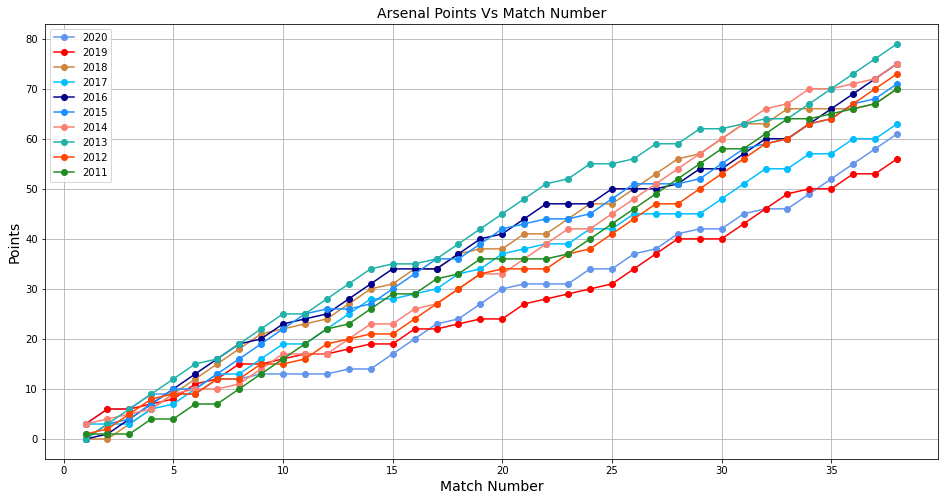

In [200]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, arsenalSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, arsenalSeason9, color='red', marker='o', label='2019')
plt.plot(matchNumbers, arsenalSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, arsenalSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, arsenalSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, arsenalSeason5, color='dodgerblue', marker='o', label='2015')
plt.plot(matchNumbers, arsenalSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, arsenalSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, arsenalSeason2, color='orangered', marker='o', label='2012')
plt.plot(matchNumbers, arsenalSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Arsenal Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [109]:
tottenhamSeason10 = matchPoints['Tottenham'][0:38]
tottenhamSeason9 = matchPoints['Tottenham'][38:76]
tottenhamSeason8 = matchPoints['Tottenham'][76:114]
tottenhamSeason7 = matchPoints['Tottenham'][114:152]
tottenhamSeason6 = matchPoints['Tottenham'][152:190]
tottenhamSeason5 = matchPoints['Tottenham'][190:228]
tottenhamSeason4 = matchPoints['Tottenham'][228:266]
tottenhamSeason3 = matchPoints['Tottenham'][266:304]
tottenhamSeason2 = matchPoints['Tottenham'][304:342]
tottenhamSeason1 = matchPoints['Tottenham'][342:380]

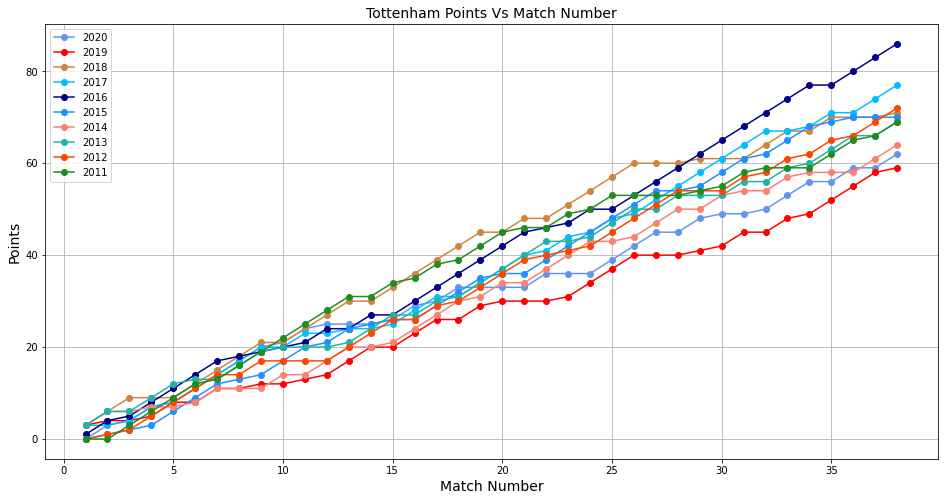

In [201]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, tottenhamSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, tottenhamSeason9, color='red', marker='o', label='2019')
plt.plot(matchNumbers, tottenhamSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, tottenhamSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, tottenhamSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, tottenhamSeason5, color='dodgerblue', marker='o', label='2015')
plt.plot(matchNumbers, tottenhamSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, tottenhamSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, tottenhamSeason2, color='orangered', marker='o', label='2012')
plt.plot(matchNumbers, tottenhamSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Tottenham Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [111]:
evertonSeason10 = matchPoints['Everton'][0:38]
evertonSeason9 = matchPoints['Everton'][38:76]
evertonSeason8 = matchPoints['Everton'][76:114]
evertonSeason7 = matchPoints['Everton'][114:152]
evertonSeason6 = matchPoints['Everton'][152:190]
evertonSeason5 = matchPoints['Everton'][190:228]
evertonSeason4 = matchPoints['Everton'][228:266]
evertonSeason3 = matchPoints['Everton'][266:304]
evertonSeason2 = matchPoints['Everton'][304:342]
evertonSeason1 = matchPoints['Everton'][342:380]

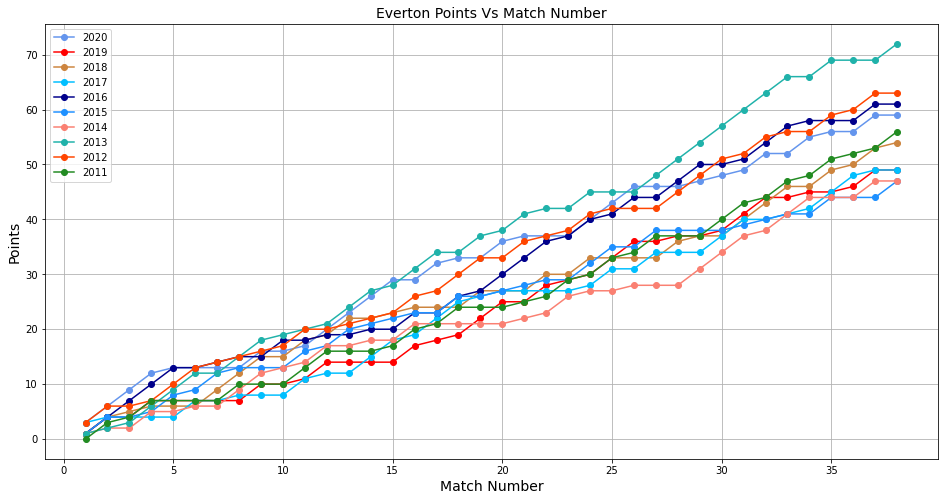

In [202]:
plt.figure(figsize=(16, 8))

plt.plot(matchNumbers, evertonSeason10, color='cornflowerblue', marker='o', label='2020')
plt.plot(matchNumbers, evertonSeason9, color='red', marker='o', label='2019')
plt.plot(matchNumbers, evertonSeason8, color='peru', marker='o', label='2018')
plt.plot(matchNumbers, evertonSeason7, color='deepskyblue', marker='o', label='2017')
plt.plot(matchNumbers, evertonSeason6, color='darkblue', marker='o', label='2016')
plt.plot(matchNumbers, evertonSeason5, color='dodgerblue', marker='o', label='2015')
plt.plot(matchNumbers, evertonSeason4, color='salmon', marker='o', label='2014')
plt.plot(matchNumbers, evertonSeason3, color='lightseagreen', marker='o', label='2013')
plt.plot(matchNumbers, evertonSeason2, color='orangered', marker='o', label='2012')
plt.plot(matchNumbers, evertonSeason1, color='forestgreen', marker='o', label='2011')

plt.title('Everton Points Vs Match Number', fontsize=14)
plt.xlabel('Match Number', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()